# 函数拟合

方程模型：$f(x) = a e^{-bx} + c$，可以使用函数 `scipy.optimize.curve_fit`。

In [1]:
from scipy.optimize import curve_fit

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
f = lambda x, a, b, c: a * np.exp(-b * x) + c

In [25]:
x_known = np.linspace(0, 100, 100)
y_known = f(x_known, 1, 0.2, 0) + 0.15 * np.random.normal(size=len(x_known))

In [26]:
p, cov = curve_fit(f, x_known, y_known)

In [27]:
y_hat = f(x_known, *p)

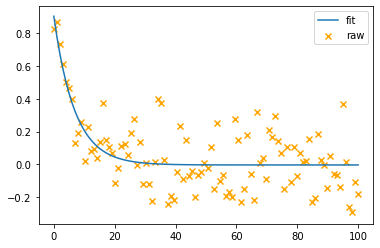

In [28]:
plt.scatter(x_known, y_known, marker="x", color="orange", label="raw")
plt.plot(x_known, y_hat, label="fit")
plt.legend()

拟合函数：$R=kT^me^{-E_a/(R_g T)}$。

In [35]:
T = np.linspace(500., 1000., 8)
R = np.array([105.598, 89.700, 70.768, 66.996, 60.711, 58.992, 55.8328, 53.420])

In [34]:
def funcR(T, k, m, EadivRg):
    return k * T**m * np.exp(EadivRg / T)

In [37]:
p, cov = curve_fit(funcR, T, R)

In [44]:
new_T = np.linspace(500, 1e3, 1e3)
new_R = funcR(new_T, *p)

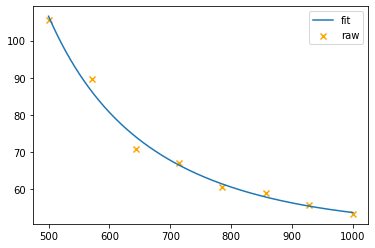

In [45]:
plt.scatter(T, R, marker="x", color="orange", label="raw")
plt.plot(new_T, new_R, label="fit")
plt.legend()